*Exploring data*

In [1]:
import pandas as pd
import numpy as np
import os

# --- CONFIG PATH ---

FILE_NAME = "telco.csv"
RAW_DATA_PATH = os.path.join("..", "data", "raw", FILE_NAME)

print(f"📂 Looking for file in: {os.path.abspath(RAW_DATA_PATH)}")

# --- CREATING DATAFRAME ---
try:
    df = pd.read_csv(RAW_DATA_PATH)
    print("✅ File loaded successfully!")
    print(f"Dataset size: {df.shape}")
    
    print("\n--- FIRST 10 ROWS ---")
    display(df.head(10))
    
    print("\n--- SHOW INFO ---")
    print(df.info())

except FileNotFoundError:
    print(f"❌ ERROR: Can't find '{FILE_NAME}'.")
    print("Check that it's in the 'data/raw/' folder!")

📂 Looking for file in: c:\Users\cappe\Downloads\Progetti\Portfolio_Project_1\data\raw\telco.csv
✅ File loaded successfully!
Dataset size: (7043, 50)

--- FIRST 10 ROWS ---


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
5,4412-YLTKF,Female,72,No,Yes,No,Yes,1,United States,California,...,10,89.91,2235.41,1,Churned,Yes,95,4638,Competitor,Competitor had better devices
6,0390-DCFDQ,Female,76,No,Yes,Yes,Yes,2,United States,California,...,0,15.28,85.73,2,Churned,Yes,76,3964,Other,Don't know
7,3445-HXXGF,Male,66,No,Yes,Yes,No,0,United States,California,...,0,0.00,2610.25,1,Churned,Yes,91,5444,Dissatisfaction,Service dissatisfaction
8,2656-FMOKZ,Female,70,No,Yes,No,Yes,2,United States,California,...,0,661.05,1806.75,2,Churned,Yes,91,5717,Dissatisfaction,Limited range of services
9,2070-FNEXE,Female,77,No,Yes,No,Yes,2,United States,California,...,0,188.65,681.20,2,Churned,Yes,81,4419,Price,Lack of affordable download/upload speed



--- SHOW INFO ---
<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   str    
 1   Gender                             7043 non-null   str    
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   str    
 4   Senior Citizen                     7043 non-null   str    
 5   Married                            7043 non-null   str    
 6   Dependents                         7043 non-null   str    
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   str    
 9   State                              7043 non-null   str    
 10  City                               7043 non-null   str    
 11  Zip Code                           7043 non-null

Detect the Target

In [3]:
# look for columns related to churn (case-insensitive)
churn_cols = [col for col in df.columns if 'churn' in col.lower()]

print("Churn-related columns found:")
print(churn_cols)

# look at the first 10 rows of these columns
display(df[churn_cols].head())

Churn-related columns found:
['Churn Label', 'Churn Score', 'Churn Category', 'Churn Reason']


,Churn Label,Churn Score,Churn Category,Churn Reason
0,Yes,91,Competitor,Competitor offered more data
1,Yes,69,Competitor,Competitor made better offer
2,Yes,81,Competitor,Competitor made better offer
3,Yes,88,Dissatisfaction,Limited range of services
4,Yes,67,Price,Extra data charges


Check if target is balanced

--- Target Distribution (Churn Label) --- end=

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64 

Percentages:
Churn Label
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


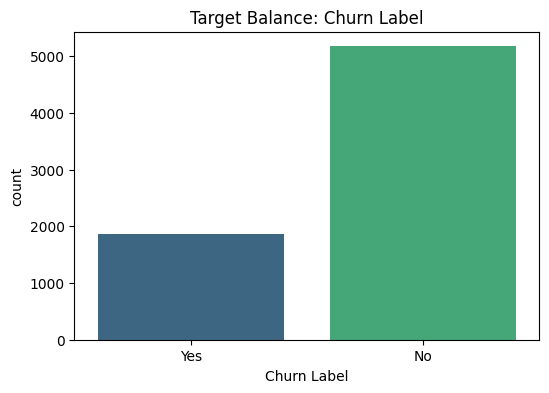

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

target_col = 'Churn Label'

# 1. Count and percentage of each class
counts = df[target_col].value_counts()
percent = df[target_col].value_counts(normalize=True) * 100

print(f"--- Target Distribution ({target_col}) ---","end=\n")
print(counts, "\n")
print(f"Percentages:\n{percent}")

# 2. Visualize the distribution with a countplot
plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, hue=target_col, data=df, palette='viridis')
plt.title(f"Target Balance: {target_col}")
plt.show()